In [2]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
from IPython.display import Image


In [3]:
sync_ratio_dataset = [100.0, 66.66666666666666, 51.28205128205128, 94.87179487179486, 78.125, 100.0, 100.0, 80.76923076923077, 53.57142857142857, 90.0, 80.0, 96.42857142857143, 97.2972972972973, 51.42857142857142, 100.0, 47.27272727272727, 94.73684210526315, 100.0, 100.0, 100.0, 62.06896551724138, 83.6734693877551, 92.5925925925926, 55.55555555555556, 100.0, 95.91836734693877, 100.0, 97.72727272727273, 50.0, 100.0, 96.29629629629629, 100.0, 100.0, 100.0, 86.95652173913044, 71.73913043478261, 97.2972972972973, 92.3076923076923, 53.84615384615385, 20.51282051282051, 100.0, 89.70588235294117, 97.26027397260275, 96.7741935483871, 100.0, 100.0, 31.372549019607842, 80.76923076923077, 92.15686274509804, 88.04347826086956, 95.74468085106383, 95.91836734693877, 100.0, 90.2439024390244, 94.11764705882352, 100.0, 95.23809523809523, 97.82608695652173, 87.5, 82.14285714285714, 100.0, 95.91836734693877, 92.0, 92.3076923076923, 100.0, 100.0, 97.87234042553192, 100.0, 94.73684210526315, 70.0, 100.0, 89.1891891891892, 100.0, 100.0, 90.69767441860465, 87.75510204081633, 95.55555555555556, 100.0, 100.0, 100.0, 62.745098039215684, 85.36585365853658, 100.0, 100.0, 97.5, 97.22222222222221, 96.0, 97.43589743589743, 100.0, 93.02325581395348, 96.0, 100.0, 100.0, 98.21428571428571, 100.0, 97.72727272727273, 90.625, 100.0, 82.85714285714286, 93.75, 100.0, 96.7741935483871, 78.46153846153847, 100.0, 97.95918367346938, 88.63636363636364, 95.1219512195122, 96.61016949152543, 79.62962962962963, 78.84615384615384, 92.0, 100.0, 82.6086956521739, 75.34246575342466, 75.67567567567568, 85.71428571428571, 100.0, 93.75, 86.95652173913044, 92.15686274509804, 91.83673469387756, 70.58823529411765, 92.7536231884058, 100.0, 72.72727272727273, 75.0, 47.22222222222222, 89.70588235294117, 85.71428571428571, 95.74468085106383, 100.0, 96.29629629629629, 100.0, 100.0, 41.37931034482759, 95.0, 82.92682926829268, 100.0, 97.22222222222221, 100.0, 92.98245614035088, 92.98245614035088, 92.85714285714286, 
80.0, 95.65217391304348, 54.54545454545454, 92.5925925925926, 95.83333333333334, 0.0, 94.28571428571428, 100.0, 95.1219512195122, 100.0, 92.85714285714286, 97.5, 100.0, 80.76923076923077, 86.3013698630137, 98.21428571428571, 97.82608695652173, 90.0, 100.0, 63.33333333333333, 81.81818181818183, 100.0, 94.44444444444444, 95.34883720930233, 76.0, 39.705882352941174, 83.72093023255815, 96.0, 29.78723404255319, 68.18181818181817, 90.76923076923077, 100.0, 95.45454545454545, 92.06349206349206, 100.0, 84.84848484848484, 100.0, 100.0, 81.25, 90.69767441860465, 87.71929824561403, 100.0, 3.4482758620689653, 97.22222222222221, 97.05882352941177, 74.4186046511628, 81.63265306122449, 61.53846153846154, 50.0, 83.33333333333334, 80.59701492537313, 100.0, 100.0, 80.0, 97.61904761904762, 100.0, 91.42857142857143, 86.88524590163934, 100.0, 100.0, 93.75, 9.30232558139535, 90.38461538461539, 93.10344827586206, 92.3076923076923, 100.0, 98.0, 86.11111111111111, 80.0, 63.63636363636363, 88.50574712643679, 20.0, 92.85714285714286, 75.0, 84.61538461538461, 100.0, 97.67441860465115, 100.0, 95.1219512195122, 97.77777777777777, 91.83673469387756, 84.90566037735849, 97.77777777777777, 100.0, 100.0, 100.0, 80.95238095238095, 73.68421052631578, 100.0, 95.45454545454545, 84.0, 86.20689655172413, 89.65517241379311, 92.0, 95.0, 66.66666666666666, 88.57142857142857, 94.23076923076923, 76.19047619047619, 100.0, 100.0, 100.0, 97.82608695652173, 81.25, 100.0, 94.44444444444444, 100.0, 100.0, 100.0, 100.0, 88.88888888888889, 100.0, 91.83673469387756, 100.0, 87.03703703703704, 100.0, 96.0, 58.536585365853654, 15.492957746478872, 100.0, 100.0, 100.0, 83.87096774193549, 82.75862068965517, 92.10526315789474, 95.45454545454545, 68.18181818181817, 100.0, 64.70588235294117, 100.0, 100.0, 93.02325581395348, 86.66666666666667, 91.17647058823529, 97.43589743589743, 80.0, 80.0, 80.0, 97.77777777777777, 100.0, 100.0, 70.6896551724138, 100.0, 96.29629629629629, 78.72340425531915, 100.0, 75.67567567567568, 100.0, 100.0, 93.47826086956522, 100.0, 96.42857142857143, 72.41379310344827, 100.0, 97.2972972972973, 79.3103448275862, 61.904761904761905, 100.0, 96.22641509433963, 97.82608695652173, 97.22222222222221, 88.46153846153845, 75.0, 100.0, 100.0, 76.92307692307693, 48.275862068965516, 88.33333333333333, 35.0, 71.42857142857143, 76.08695652173914, 83.33333333333334, 100.0, 100.0, 86.3013698630137, 94.73684210526315, 93.93939393939394, 85.18518518518519, 26.666666666666668, 88.37209302325581, 100.0, 54.54545454545454, 49.152542372881356, 76.92307692307693, 100.0, 98.4375, 95.45454545454545, 93.10344827586206, 46.51162790697674, 100.0, 100.0, 90.625, 50.0, 95.34883720930233, 81.48148148148148, 93.61702127659575, 93.47826086956522, 58.333333333333336, 86.66666666666667, 94.0, 100.0, 100.0, 100.0, 90.32258064516128, 100.0, 100.0, 98.57142857142858, 100.0, 100.0, 100.0, 94.44444444444444, 94.64285714285714, 88.88888888888889, 72.0, 100.0, 97.36842105263158, 78.26086956521739, 80.0, 100.0, 100.0, 96.0, 100.0, 100.0, 96.15384615384616, 86.20689655172413, 92.85714285714286, 97.5, 86.66666666666667, 94.82758620689656, 100.0, 97.43589743589743, 100.0, 100.0, 80.85106382978722, 100.0, 92.85714285714286, 90.38461538461539, 97.22222222222221, 100.0, 100.0, 81.57894736842105, 85.71428571428571, 98.78048780487805, 100.0, 96.36363636363636, 97.91666666666666, 100.0, 96.36363636363636, 100.0, 74.13793103448276, 96.96969696969697, 81.57894736842105, 56.41025641025641, 78.18181818181819, 71.05263157894737, 96.61016949152543, 98.30508474576271, 94.73684210526315, 98.30508474576271, 100.0, 53.333333333333336, 100.0, 100.0, 96.66666666666667]


In [4]:
mean_green_path = 71.16

mean_red_path = 5.98
mean_red_path_3 = 0.33
mean_red_path_4 = 0.0
mean_red_path_all = 6.31

mean_blue_path = 19.73
mean_blue_path_3 = 2.2
mean_blue_path_4 = 0.6
mean_blue_path_all = 22.53


###
green_path_data = [92.5925925925926, 61.53846153846154, 62.5, 94.5945945945946, 4.0, 81.81818181818183, 68.42105263157895, 23.809523809523807, 33.33333333333333, 0.0, 100.0, 100.0, 100.0, 55.55555555555556, 19.047619047619047, 34.61538461538461, 69.44444444444444, 100.0, 31.11111111111111, 77.77777777777779, 88.88888888888889, 14.634146341463413, 60.0, 86.66666666666667, 88.88888888888889, 89.36170212765957, 100.0, 41.86046511627907, 68.42105263157895, 80.0, 65.38461538461539, 100.0, 85.71428571428571, 66.66666666666666, 47.5, 60.60606060606061, 94.44444444444444, 58.333333333333336, 100.0, 100.0, 69.56521739130434, 50.81967213114754, 90.14084507042254, 93.33333333333333, 75.67567567567568, 81.13207547169812, 75.0, 80.95238095238095, 100.0, 86.41975308641975, 66.66666666666666, 97.87234042553192, 100.0, 86.48648648648648, 72.91666666666666, 96.96969696969697, 60.0, 35.55555555555556, 64.28571428571429, 13.043478260869565, 81.48148148148148, 29.78723404255319, 52.17391304347826, 62.5, 22.22222222222222, 69.6969696969697, 86.95652173913044, 83.33333333333334, 69.44444444444444, 85.71428571428571, 0.0, 87.87878787878788, 57.14285714285714, 78.37837837837837, 89.74358974358975, 100.0, 93.02325581395348, 76.0, 82.6086956521739, 100.0, 96.875, 97.14285714285714, 100.0, 92.5925925925926, 64.1025641025641, 51.42857142857142, 100.0, 100.0, 4.545454545454546, 52.5, 100.0, 100.0, 100.0, 69.0909090909091, 95.91836734693877, 93.02325581395348, 31.03448275862069, 64.51612903225806, 100.0, 16.666666666666664, 30.434782608695656, 93.33333333333333, 62.745098039215684, 76.92307692307693, 100.0, 97.43589743589743, 94.87179487179486, 87.71929824561403, 95.34883720930233, 85.36585365853658, 52.17391304347826, 100.0, 89.47368421052632, 67.27272727272727, 100.0, 10.416666666666668, 97.87234042553192, 80.0, 100.0, 100.0, 97.77777777777777, 79.16666666666666, 96.875, 13.333333333333334, 100.0, 92.5925925925926, 58.82352941176471, 50.81967213114754, 79.16666666666666, 66.66666666666666, 82.6086956521739, 69.23076923076923, 100.0, 100.0, 100.0, 5.263157894736842, 17.647058823529413, 15.384615384615385, 100.0, 100.0, 60.37735849056604, 54.71698113207547, 10.256410256410255, 95.0, 100.0, 0.0, 44.0, 93.47826086956522, 81.81818181818183, 100.0, 84.61538461538461, 100.0, 50.0, 64.1025641025641, 100.0, 23.809523809523807, 66.66666666666666, 69.0909090909091, 82.22222222222221, 33.33333333333333, 100.0, 89.47368421052632, 53.333333333333336, 64.0, 14.705882352941178, 70.73170731707317, 57.89473684210527, 0.0, 91.66666666666666, 2.083333333333333, 100.0, 86.66666666666667, 91.52542372881356, 36.84210526315789, 47.61904761904761, 75.86206896551724, 5.555555555555555, 100.0, 45.0, 73.91304347826086, 3.8461538461538463, 2.564102564102564, 42.0, 9.375, 100.0, 48.57142857142857, 72.72727272727273, 100.0, 72.5, 100.0, 65.51724137931035, 84.0, 74.07407407407408, 82.85714285714286, 97.2972972972973, 91.66666666666666, 41.46341463414634, 100.0, 40.625, 50.943396226415096, 80.0, 70.45454545454545, 73.33333333333333, 100.0, 93.61702127659575, 100.0, 66.66666666666666, 88.23529411764706, 87.75510204081633, 100.0, 100.0, 96.42857142857143, 66.23376623376623, 45.45454545454545, 34.61538461538461, 100.0, 65.9090909090909, 56.75675675675676, 97.61904761904762, 61.29032258064516, 94.87179487179486, 88.63636363636364, 100.0, 84.44444444444444, 97.72727272727273, 62.96296296296296, 63.23529411764706, 3.7735849056603774, 100.0, 100.0, 4.545454545454546, 93.65079365079364, 100.0, 76.0, 73.07692307692307, 100.0, 11.842105263157894, 45.45454545454545, 83.87096774193549, 73.46938775510205, 95.83333333333334, 13.333333333333334, 64.28571428571429, 89.1891891891892, 95.55555555555556, 100.0, 94.28571428571428, 75.0, 38.46153846153847, 100.0, 59.61538461538461, 60.86956521739131, 100.0, 25.0, 95.55555555555556, 20.0, 61.702127659574465, 51.724137931034484, 100.0, 75.0, 90.9090909090909, 72.91666666666666, 100.0, 100.0, 80.76923076923077, 33.33333333333333, 31.428571428571427, 57.14285714285714, 86.66666666666667, 100.0, 18.181818181818183, 0.0, 52.54237288135594, 52.5, 89.74358974358975, 77.41935483870968, 100.0, 71.42857142857143, 0.0, 87.5, 86.36363636363636, 87.87878787878788, 47.22222222222222, 95.1219512195122, 100.0, 69.23076923076923, 13.513513513513514, 44.73684210526316, 35.714285714285715, 46.666666666666664, 100.0, 100.0, 79.54545454545455, 100.0, 90.47619047619048, 57.692307692307686, 38.88888888888889, 73.91304347826086, 88.46153846153845, 40.38461538461539, 76.47058823529412, 97.77777777777777, 94.28571428571428, 100.0, 90.9090909090909, 42.857142857142854, 80.64516129032258, 100.0, 14.285714285714285, 100.0, 85.71428571428571, 40.0, 85.71428571428571, 50.0, 100.0, 63.1578947368421, 33.33333333333333, 94.44444444444444, 67.74193548387096, 100.0, 100.0, 42.10526315789473, 60.0, 80.95238095238095, 100.0, 93.33333333333333, 88.23529411764706, 100.0, 47.61904761904761, 48.148148148148145, 90.0, 100.0, 0.0, 82.75862068965517, 93.75, 85.36585365853658, 63.63636363636363, 90.9090909090909, 25.581395348837212, 100.0, 25.64102564102564, 17.02127659574468, 68.42105263157895, 58.333333333333336, 100.0, 100.0, 72.72727272727273, 53.84615384615385, 85.5072463768116, 80.0, 80.55555555555556, 100.0, 58.82352941176471, 20.754716981132077, 100.0, 100.0, 100.0, 72.97297297297297, 83.33333333333334, 15.384615384615385, 5.555555555555555, 0.0, 100.0, 95.74468085106383, 13.043478260869565, 76.0, 96.0, 23.076923076923077, 58.97435897435898, 25.64102564102564, 100.0, 29.03225806451613, 92.10526315789474, 88.37209302325581, 91.66666666666666, 94.73684210526315, 88.23529411764706, 100.0, 57.446808510638306, 94.28571428571428, 14.285714285714285, 83.78378378378379, 100.0, 79.16666666666666, 77.77777777777779, 96.875, 96.22641509433963, 70.2127659574468, 46.34146341463415, 92.45283018867924, 87.5, 83.72093023255815, 100.0, 100.0, 90.9090909090909, 72.09302325581395, 40.74074074074074, 28.947368421052634, 75.86206896551724, 58.333333333333336, 75.86206896551724, 72.41379310344827, 100.0, 90.0, 100.0, 79.3103448275862]

red_path_data = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.11111111111111, 0.0, 53.84615384615385, 30.555555555555557, 0.0, 0.0, 0.0, 11.11111111111111, 0.0, 0.0, 13.333333333333334, 11.11111111111111, 10.638297872340425, 0.0, 0.0, 0.0, 0.0, 34.61538461538461, 0.0, 14.285714285714285, 4.761904761904762, 2.5, 39.39393939393939, 0.0, 41.66666666666667, 0.0, 0.0, 0.0, 0.0, 9.859154929577464, 0.0, 2.7027027027027026, 1.8867924528301887, 12.5, 19.047619047619047, 0.0, 0.0, 33.33333333333333, 2.127659574468085, 0.0, 10.81081081081081, 10.416666666666668, 0.0, 0.0, 64.44444444444444, 2.380952380952381, 0.0, 18.51851851851852, 6.382978723404255, 0.0, 0.0, 55.55555555555556, 0.0, 0.0, 0.0, 30.555555555555557, 0.0, 66.66666666666666, 0.0, 42.857142857142854, 10.81081081081081, 5.128205128205128, 0.0, 2.3255813953488373, 0.0, 0.0, 0.0, 3.125, 2.857142857142857, 0.0, 0.0, 0.0, 5.714285714285714, 0.0, 0.0, 4.545454545454546, 2.5, 0.0, 0.0, 0.0, 1.8181818181818181, 0.0, 6.976744186046512, 8.620689655172415, 29.03225806451613, 0.0, 0.0, 0.0, 6.666666666666667, 0.0, 23.076923076923077, 0.0, 2.564102564102564, 0.0, 5.263157894736842, 4.651162790697675, 14.634146341463413, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.127659574468085, 8.88888888888889, 0.0, 0.0, 2.2222222222222223, 20.833333333333336, 3.125, 0.0, 0.0, 0.0, 0.0, 0.0, 20.833333333333336, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 56.00000000000001, 6.521739130434782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8181818181818181, 11.11111111111111, 0.0, 0.0, 10.526315789473683, 15.555555555555555, 36.0, 0.0, 0.0, 0.0, 0.0, 8.333333333333332, 0.0, 0.0, 13.333333333333334, 5.084745762711865, 10.526315789473683, 0.0, 0.0, 0.0, 0.0, 0.0, 17.391304347826086, 0.0, 0.0, 42.0, 0.0, 0.0, 0.0, 21.21212121212121, 0.0, 17.5, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7027027027027026, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 6.382978723404255, 0.0, 0.0, 11.76470588235294, 4.081632653061225, 0.0, 0.0, 3.571428571428571, 3.896103896103896, 0.0, 3.8461538461538463, 0.0, 0.0, 16.216216216216218, 2.380952380952381, 0.0, 5.128205128205128, 2.272727272727273, 0.0, 11.11111111111111, 2.272727272727273, 37.03703703703704, 0.0, 1.8867924528301887, 0.0, 0.0, 4.545454545454546, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3157894736842104, 0.0, 3.225806451612903, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.714285714285714, 1.4705882352941175, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.444444444444445, 0.0, 8.51063829787234, 0.0, 0.0, 25.0, 9.090909090909092, 0.0, 0.0, 0.0, 3.8461538461538463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5, 10.256410256410255, 22.58064516129032, 0.0, 0.0, 0.0, 4.166666666666666, 0.0, 9.090909090909092, 2.7777777777777777, 0.0, 0.0, 0.0, 0.0, 23.684210526315788, 60.71428571428571, 0.0, 0.0, 0.0, 20.454545454545457, 0.0, 9.523809523809524, 0.0, 55.55555555555556, 0.0, 11.538461538461538, 55.769230769230774, 21.568627450980394, 2.2222222222222223, 0.0, 0.0, 9.090909090909092, 53.57142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 5.714285714285714, 0.0, 0.0, 0.0, 0.0, 5.555555555555555, 32.25806451612903, 0.0, 0.0, 42.10526315789473, 0.0, 0.0, 0.0, 6.666666666666667, 11.76470588235294, 0.0, 52.38095238095239, 51.85185185185185, 10.0, 0.0, 0.0, 17.24137931034483, 6.25, 0.0, 0.0, 0.0, 0.0, 0.0, 74.35897435897436, 0.0, 0.0, 12.5, 0.0, 0.0, 9.090909090909092, 46.15384615384615, 2.898550724637681, 0.0, 19.444444444444446, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.405405405405405, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 24.0, 4.0, 0.0, 0.0, 74.35897435897436, 0.0, 0.0, 2.631578947368421, 2.3255813953488373, 2.7777777777777777, 0.0, 11.76470588235294, 0.0, 4.25531914893617, 0.0, 0.0, 0.0, 0.0, 20.833333333333336, 0.0, 0.0, 3.7735849056603774, 0.0, 7.317073170731707, 7.547169811320755, 0.0, 16.27906976744186, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8771929824561403, 24.137931034482758, 2.7777777777777777, 24.137931034482758, 0.0, 0.0, 10.0, 0.0, 0.0]
red_path_3_data = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8461538461538463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8867924528301887, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7027027027027026, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.22222222222222, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.451612903225806, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.2222222222222223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.444444444444445, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0303030303030303, 0.0, 0.0, 0.0, 0.0, 0.0, 31.57894736842105, 3.571428571428571, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.8461538461538463, 1.9607843137254901, 0.0, 0.0, 0.0, 0.0, 3.571428571428571, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.857142857142857, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.651162790697675, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.4390243902439024, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mead_red_path_4 = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
red_path_sum_data = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.11111111111111, 0.0, 57.692307692307686, 30.555555555555557, 0.0, 0.0, 0.0, 11.11111111111111, 0.0, 0.0, 13.333333333333334, 11.11111111111111, 10.638297872340425, 0.0, 0.0, 0.0, 0.0, 34.61538461538461, 0.0, 14.285714285714285, 4.761904761904762, 2.5, 39.39393939393939, 0.0, 41.66666666666667, 0.0, 0.0, 0.0, 0.0, 9.859154929577464, 0.0, 2.7027027027027026, 3.7735849056603774, 12.5, 19.047619047619047, 0.0, 0.0, 33.33333333333333, 2.127659574468085, 0.0, 13.513513513513514, 10.416666666666668, 0.0, 0.0, 64.44444444444444, 2.380952380952381, 0.0, 18.51851851851852, 6.382978723404255, 0.0, 0.0, 77.77777777777779, 0.0, 0.0, 0.0, 30.555555555555557, 0.0, 100.0, 0.0, 42.857142857142854, 10.81081081081081, 5.128205128205128, 0.0, 2.3255813953488373, 0.0, 0.0, 0.0, 3.125, 2.857142857142857, 0.0, 0.0, 0.0, 5.714285714285714, 0.0, 0.0, 4.545454545454546, 2.5, 0.0, 0.0, 0.0, 1.8181818181818181, 0.0, 6.976744186046512, 8.620689655172415, 35.483870967741936, 0.0, 0.0, 0.0, 6.666666666666667, 0.0, 23.076923076923077, 0.0, 2.564102564102564, 0.0, 5.263157894736842, 4.651162790697675, 14.634146341463413, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.127659574468085, 8.88888888888889, 0.0, 0.0, 2.2222222222222223, 20.833333333333336, 3.125, 0.0, 0.0, 0.0, 0.0, 0.0, 20.833333333333336, 33.33333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.0, 0.0, 0.0, 56.00000000000001, 6.521739130434782, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.8181818181818181, 13.333333333333334, 0.0, 0.0, 10.526315789473683, 15.555555555555555, 36.0, 0.0, 0.0, 0.0, 0.0, 8.333333333333332, 0.0, 0.0, 13.333333333333334, 5.084745762711865, 10.526315789473683, 0.0, 0.0, 0.0, 0.0, 0.0, 17.391304347826086, 0.0, 0.0, 42.0, 0.0, 0.0, 0.0, 21.21212121212121, 0.0, 17.5, 0.0, 0.0, 0.0, 0.0, 0.0, 2.7027027027027026, 0.0, 0.0, 0.0, 0.0, 0.0, 20.0, 0.0, 0.0, 0.0, 6.382978723404255, 0.0, 0.0, 11.76470588235294, 4.081632653061225, 0.0, 0.0, 3.571428571428571, 3.896103896103896, 0.0, 3.8461538461538463, 0.0, 0.0, 16.216216216216218, 2.380952380952381, 0.0, 5.128205128205128, 2.272727272727273, 0.0, 15.555555555555555, 2.272727272727273, 37.03703703703704, 0.0, 1.8867924528301887, 0.0, 0.0, 4.545454545454546, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3157894736842104, 0.0, 3.225806451612903, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.714285714285714, 1.4705882352941175, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.444444444444445, 0.0, 8.51063829787234, 0.0, 0.0, 25.0, 9.090909090909092, 0.0, 0.0, 0.0, 3.8461538461538463, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.5, 10.256410256410255, 22.58064516129032, 0.0, 0.0, 0.0, 4.166666666666666, 0.0, 12.121212121212121, 2.7777777777777777, 0.0, 0.0, 0.0, 0.0, 55.26315789473685, 64.28571428571429, 0.0, 0.0, 0.0, 20.454545454545457, 0.0, 9.523809523809524, 0.0, 55.55555555555556, 0.0, 11.538461538461538, 59.61538461538461, 23.52941176470588, 2.2222222222222223, 0.0, 0.0, 9.090909090909092, 57.14285714285714, 0.0, 0.0, 0.0, 0.0, 0.0, 16.0, 8.571428571428571, 0.0, 0.0, 0.0, 0.0, 5.555555555555555, 32.25806451612903, 0.0, 0.0, 42.10526315789473, 0.0, 0.0, 0.0, 6.666666666666667, 11.76470588235294, 0.0, 52.38095238095239, 51.85185185185185, 10.0, 0.0, 0.0, 17.24137931034483, 6.25, 0.0, 0.0, 0.0, 0.0, 0.0, 74.35897435897436, 0.0, 0.0, 12.5, 0.0, 0.0, 9.090909090909092, 46.15384615384615, 2.898550724637681, 0.0, 19.444444444444446, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.405405405405405, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 24.0, 4.0, 0.0, 0.0, 74.35897435897436, 0.0, 0.0, 2.631578947368421, 6.976744186046512, 2.7777777777777777, 0.0, 11.76470588235294, 0.0, 4.25531914893617, 0.0, 0.0, 0.0, 0.0, 20.833333333333336, 0.0, 0.0, 3.7735849056603774, 0.0, 9.75609756097561, 7.547169811320755, 0.0, 16.27906976744186, 0.0, 0.0, 0.0, 0.0, 0.0, 0.8771929824561403, 24.137931034482758, 2.7777777777777777, 24.137931034482758, 0.0, 0.0, 10.0, 0.0, 0.0]

blue_path_data = [7.4074074074074066, 38.46153846153847, 30.0, 5.405405405405405, 72.0, 18.181818181818183, 31.57894736842105, 61.904761904761905, 66.66666666666666, 88.88888888888889, 0.0, 0.0, 0.0, 0.0, 38.095238095238095, 7.6923076923076925, 0.0, 0.0, 62.22222222222222, 22.22222222222222, 0.0, 78.04878048780488, 40.0, 0.0, 0.0, 0.0, 0.0, 51.162790697674424, 31.57894736842105, 20.0, 0.0, 0.0, 0.0, 28.57142857142857, 40.0, 0.0, 5.555555555555555, 0.0, 0.0, 0.0, 30.434782608695656, 49.18032786885246, 0.0, 6.666666666666667, 21.62162162162162, 3.7735849056603774, 12.5, 0.0, 0.0, 9.876543209876543, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 3.0303030303030303, 40.0, 0.0, 4.761904761904762, 34.78260869565217, 0.0, 38.297872340425535, 47.82608695652174, 25.0, 0.0, 30.303030303030305, 13.043478260869565, 16.666666666666664, 0.0, 0.0, 0.0, 12.121212121212121, 0.0, 10.81081081081081, 5.128205128205128, 0.0, 4.651162790697675, 24.0, 17.391304347826086, 0.0, 0.0, 0.0, 0.0, 7.4074074074074066, 35.8974358974359, 34.285714285714285, 0.0, 0.0, 90.9090909090909, 20.0, 0.0, 0.0, 0.0, 29.09090909090909, 4.081632653061225, 0.0, 34.48275862068966, 0.0, 0.0, 73.33333333333333, 69.56521739130434, 0.0, 31.372549019607842, 0.0, 0.0, 0.0, 5.128205128205128, 7.017543859649122, 0.0, 0.0, 47.82608695652174, 0.0, 10.526315789473683, 32.72727272727273, 0.0, 41.66666666666667, 0.0, 4.444444444444445, 0.0, 0.0, 0.0, 0.0, 0.0, 86.66666666666667, 0.0, 7.4074074074074066, 41.17647058823529, 49.18032786885246, 0.0, 0.0, 17.391304347826086, 30.76923076923077, 0.0, 0.0, 0.0, 63.1578947368421, 82.35294117647058, 84.61538461538461, 0.0, 0.0, 33.9622641509434, 45.28301886792453, 82.05128205128204, 0.0, 0.0, 77.77777777777779, 0.0, 0.0, 18.181818181818183, 0.0, 15.384615384615385, 0.0, 38.46153846153847, 35.8974358974359, 0.0, 61.904761904761905, 22.22222222222222, 29.09090909090909, 4.444444444444445, 66.66666666666666, 0.0, 0.0, 31.11111111111111, 0.0, 76.47058823529412, 4.878048780487805, 42.10526315789473, 74.07407407407408, 0.0, 62.5, 0.0, 0.0, 3.389830508474576, 52.63157894736842, 42.857142857142854, 24.137931034482758, 77.77777777777779, 0.0, 25.0, 8.695652173913043, 84.61538461538461, 97.43589743589743, 16.0, 90.625, 0.0, 51.42857142857142, 6.0606060606060606, 0.0, 10.0, 0.0, 34.48275862068966, 16.0, 14.814814814814813, 17.142857142857142, 0.0, 8.333333333333332, 58.536585365853654, 0.0, 31.25, 49.056603773584904, 0.0, 22.727272727272727, 26.666666666666668, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 8.16326530612245, 0.0, 0.0, 0.0, 18.181818181818183, 54.54545454545454, 42.30769230769231, 0.0, 27.27272727272727, 27.027027027027028, 0.0, 38.70967741935484, 0.0, 9.090909090909092, 0.0, 0.0, 0.0, 0.0, 32.35294117647059, 94.33962264150944, 0.0, 0.0, 90.9090909090909, 6.349206349206349, 0.0, 24.0, 26.923076923076923, 0.0, 78.94736842105263, 54.54545454545454, 12.903225806451612, 20.408163265306122, 4.166666666666666, 86.66666666666667, 35.714285714285715, 10.81081081081081, 4.444444444444445, 0.0, 0.0, 23.52941176470588, 61.53846153846154, 0.0, 34.61538461538461, 39.130434782608695, 0.0, 75.0, 0.0, 80.0, 29.78723404255319, 0.0, 0.0, 0.0, 0.0, 20.833333333333336, 0.0, 0.0, 15.384615384615385, 25.0, 57.14285714285714, 42.857142857142854, 13.333333333333334, 0.0, 72.72727272727273, 100.0, 47.45762711864407, 20.0, 0.0, 0.0, 0.0, 28.57142857142857, 100.0, 8.333333333333332, 13.636363636363635, 0.0, 16.666666666666664, 4.878048780487805, 0.0, 30.76923076923077, 59.45945945945946, 0.0, 0.0, 53.333333333333336, 0.0, 0.0, 0.0, 0.0, 0.0, 30.76923076923077, 5.555555555555555, 26.08695652173913, 0.0, 0.0, 0.0, 0.0, 5.714285714285714, 0.0, 0.0, 0.0, 19.35483870967742, 0.0, 85.71428571428571, 0.0, 14.285714285714285, 32.0, 5.714285714285714, 50.0, 0.0, 36.84210526315789, 60.317460317460316, 0.0, 0.0, 0.0, 0.0, 15.789473684210526, 40.0, 19.047619047619047, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 14.634146341463413, 36.36363636363637, 9.090909090909092, 74.4186046511628, 0.0, 0.0, 76.59574468085107, 31.57894736842105, 16.666666666666664, 0.0, 0.0, 18.181818181818183, 0.0, 11.594202898550725, 20.0, 0.0, 0.0, 23.52941176470588, 79.24528301886792, 0.0, 0.0, 0.0, 21.62162162162162, 16.666666666666664, 73.07692307692307, 94.44444444444444, 100.0, 0.0, 4.25531914893617, 86.95652173913044, 0.0, 0.0, 57.692307692307686, 30.76923076923077, 0.0, 0.0, 70.96774193548387, 5.263157894736842, 4.651162790697675, 5.555555555555555, 5.263157894736842, 0.0, 0.0, 25.53191489361702, 5.714285714285714, 85.71428571428571, 16.216216216216218, 0.0, 0.0, 22.22222222222222, 3.125, 0.0, 29.78723404255319, 43.90243902439025, 0.0, 12.5, 0.0, 0.0, 0.0, 9.090909090909092, 27.906976744186046, 59.25925925925925, 70.17543859649122, 0.0, 38.88888888888889, 0.0, 27.586206896551722, 0.0, 0.0, 0.0, 20.689655172413794]
blue_path_3_data = [0.0, 0.0, 7.5, 0.0, 24.0, 0.0, 0.0, 14.285714285714285, 0.0, 11.11111111111111, 0.0, 0.0, 0.0, 33.33333333333333, 42.857142857142854, 0.0, 0.0, 0.0, 6.666666666666667, 0.0, 0.0, 7.317073170731707, 0.0, 0.0, 0.0, 0.0, 0.0, 6.976744186046512, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.320754716981133, 0.0, 0.0, 0.0, 3.7037037037037033, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.57142857142857, 52.17391304347826, 0.0, 25.53191489361702, 0.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0, 14.285714285714285, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.571428571428571, 0.0, 0.0, 0.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 25.862068965517242, 0.0, 0.0, 10.0, 0.0, 0.0, 5.88235294117647, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 31.25, 0.0, 6.666666666666667, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 31.57894736842105, 0.0, 0.0, 0.0, 0.0, 5.660377358490567, 0.0, 7.6923076923076925, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.538461538461538, 0.0, 0.0, 14.285714285714285, 4.761904761904762, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.823529411764707, 14.634146341463413, 0.0, 11.11111111111111, 0.0, 18.75, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 0.0, 30.0, 0.0, 11.538461538461538, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.11111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, 28.125, 0.0, 0.0, 6.8181818181818175, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.688311688311687, 0.0, 11.538461538461538, 0.0, 6.8181818181818175, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.411764705882353, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.894736842105263, 0.0, 0.0, 6.122448979591836, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 5.769230769230769, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.25, 0.0, 0.0, 0.0, 25.0, 0.0, 0.0, 0.0, 0.0, 9.090909090909092, 0.0, 0.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 0.0, 0.0, 16.216216216216218, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.538461538461538, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.382978723404255, 0.0, 12.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 17.647058823529413, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.538461538461538, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 11.538461538461538, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.76595744680851, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
blue_path_4_data = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.22222222222222, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.349206349206349, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.75609756097561, 0.0, 14.814814814814813, 0.0, 16.666666666666664, 0.0, 0.0, 0.0, 0.0, 9.523809523809524, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.6923076923076925, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 48.275862068965516, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 11.428571428571429, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.81081081081081, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 6.349206349206349, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.6923076923076925, 10.256410256410255, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
blue_path_sum_data = [7.4074074074074066, 38.46153846153847, 37.5, 5.405405405405405, 96.0, 18.181818181818183, 31.57894736842105, 76.19047619047619, 66.66666666666666, 100.0, 0.0, 0.0, 0.0, 33.33333333333333, 80.95238095238095, 7.6923076923076925, 0.0, 0.0, 68.88888888888889, 22.22222222222222, 0.0, 85.36585365853658, 40.0, 0.0, 0.0, 0.0, 0.0, 58.139534883720934, 31.57894736842105, 20.0, 0.0, 0.0, 0.0, 28.57142857142857, 50.0, 0.0, 5.555555555555555, 0.0, 0.0, 0.0, 30.434782608695656, 49.18032786885246, 0.0, 6.666666666666667, 21.62162162162162, 15.09433962264151, 12.5, 0.0, 0.0, 13.580246913580247, 0.0, 0.0, 0.0, 0.0, 16.666666666666664, 3.0303030303030303, 40.0, 0.0, 33.33333333333333, 86.95652173913044, 0.0, 63.829787234042556, 47.82608695652174, 37.5, 0.0, 30.303030303030305, 13.043478260869565, 16.666666666666664, 0.0, 14.285714285714285, 0.0, 12.121212121212121, 0.0, 10.81081081081081, 5.128205128205128, 0.0, 4.651162790697675, 24.0, 17.391304347826086, 0.0, 0.0, 0.0, 0.0, 7.4074074074074066, 35.8974358974359, 42.857142857142854, 0.0, 0.0, 90.9090909090909, 45.0, 0.0, 0.0, 0.0, 29.09090909090909, 4.081632653061225, 0.0, 60.3448275862069, 0.0, 0.0, 83.33333333333334, 69.56521739130434, 0.0, 37.254901960784316, 0.0, 0.0, 0.0, 5.128205128205128, 7.017543859649122, 0.0, 0.0, 47.82608695652174, 0.0, 10.526315789473683, 32.72727272727273, 0.0, 89.58333333333334, 0.0, 11.11111111111111, 0.0, 0.0, 0.0, 0.0, 0.0, 86.66666666666667, 0.0, 7.4074074074074066, 41.17647058823529, 49.18032786885246, 0.0, 0.0, 17.391304347826086, 30.76923076923077, 0.0, 0.0, 0.0, 94.73684210526315, 82.35294117647058, 84.61538461538461, 0.0, 0.0, 39.62264150943396, 45.28301886792453, 89.74358974358975, 0.0, 0.0, 100.0, 0.0, 0.0, 18.181818181818183, 0.0, 15.384615384615385, 0.0, 50.0, 35.8974358974359, 0.0, 76.19047619047619, 33.33333333333333, 29.09090909090909, 4.444444444444445, 66.66666666666666, 0.0, 0.0, 31.11111111111111, 0.0, 85.29411764705883, 29.268292682926827, 42.10526315789473, 100.0, 0.0, 97.91666666666666, 0.0, 0.0, 3.389830508474576, 52.63157894736842, 52.38095238095239, 24.137931034482758, 94.44444444444444, 0.0, 55.00000000000001, 8.695652173913043, 96.15384615384616, 97.43589743589743, 16.0, 90.625, 0.0, 51.42857142857142, 6.0606060606060606, 0.0, 10.0, 0.0, 34.48275862068966, 16.0, 25.925925925925924, 17.142857142857142, 0.0, 8.333333333333332, 58.536585365853654, 0.0, 59.375, 49.056603773584904, 0.0, 29.545454545454547, 26.666666666666668, 0.0, 0.0, 0.0, 33.33333333333333, 0.0, 8.16326530612245, 0.0, 0.0, 0.0, 29.87012987012987, 54.54545454545454, 61.53846153846154, 0.0, 34.090909090909086, 27.027027027027028, 0.0, 38.70967741935484, 0.0, 9.090909090909092, 0.0, 0.0, 0.0, 0.0, 36.76470588235294, 94.33962264150944, 0.0, 0.0, 90.9090909090909, 6.349206349206349, 0.0, 24.0, 26.923076923076923, 0.0, 86.8421052631579, 54.54545454545454, 12.903225806451612, 26.53061224489796, 4.166666666666666, 86.66666666666667, 35.714285714285715, 10.81081081081081, 4.444444444444445, 0.0, 0.0, 23.52941176470588, 61.53846153846154, 0.0, 40.38461538461539, 39.130434782608695, 0.0, 75.0, 0.0, 80.0, 29.78723404255319, 48.275862068965516, 0.0, 0.0, 0.0, 27.083333333333332, 0.0, 0.0, 15.384615384615385, 66.66666666666666, 68.57142857142857, 42.857142857142854, 13.333333333333334, 0.0, 81.81818181818183, 100.0, 47.45762711864407, 45.0, 0.0, 0.0, 0.0, 28.57142857142857, 100.0, 8.333333333333332, 13.636363636363635, 0.0, 50.0, 4.878048780487805, 0.0, 30.76923076923077, 86.48648648648648, 0.0, 0.0, 53.333333333333336, 0.0, 0.0, 0.0, 0.0, 0.0, 42.30769230769231, 5.555555555555555, 26.08695652173913, 0.0, 0.0, 0.0, 0.0, 5.714285714285714, 0.0, 0.0, 0.0, 19.35483870967742, 0.0, 85.71428571428571, 0.0, 14.285714285714285, 44.0, 5.714285714285714, 50.0, 0.0, 36.84210526315789, 66.66666666666666, 0.0, 0.0, 0.0, 0.0, 15.789473684210526, 40.0, 19.047619047619047, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0, 14.634146341463413, 36.36363636363637, 9.090909090909092, 74.4186046511628, 0.0, 0.0, 82.97872340425532, 31.57894736842105, 29.166666666666668, 0.0, 0.0, 18.181818181818183, 0.0, 11.594202898550725, 20.0, 0.0, 0.0, 41.17647058823529, 79.24528301886792, 0.0, 0.0, 0.0, 21.62162162162162, 16.666666666666664, 84.61538461538461, 94.44444444444444, 100.0, 0.0, 4.25531914893617, 86.95652173913044, 0.0, 0.0, 76.92307692307693, 41.02564102564102, 0.0, 0.0, 70.96774193548387, 5.263157894736842, 4.651162790697675, 5.555555555555555, 5.263157894736842, 0.0, 0.0, 38.297872340425535, 5.714285714285714, 85.71428571428571, 16.216216216216218, 0.0, 0.0, 22.22222222222222, 3.125, 0.0, 29.78723404255319, 43.90243902439025, 0.0, 12.5, 0.0, 0.0, 0.0, 9.090909090909092, 27.906976744186046, 59.25925925925925, 70.17543859649122, 0.0, 38.88888888888889, 0.0, 27.586206896551722, 0.0, 0.0, 0.0, 20.689655172413794]


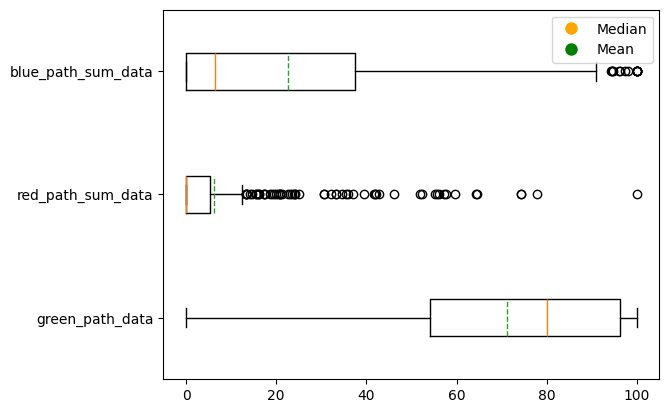

In [5]:
data = [green_path_data,
        red_path_sum_data,
        blue_path_sum_data]

medians = [statistics.median(d) for d in data]

# Calculate means
means = [statistics.mean(d) for d in data]

# Labels for x-axis
labels = ['green_path_data', 'red_path_sum_data', 'blue_path_sum_data']

# Plotting boxplots
plt.boxplot(data, labels=labels, vert=False, meanline=True, showmeans=True)

# Adding labels and title
plt.xlabel('')
plt.title('')

median_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Median')
mean_legend = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Mean')
plt.legend(handles=[median_legend, mean_legend], loc="upper right")

# Show the plot
plt.show()

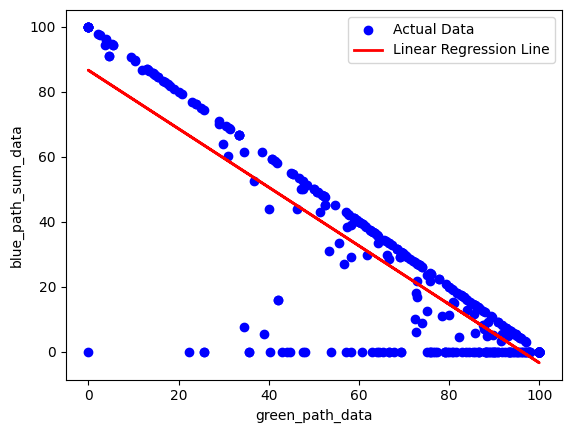

In [6]:
# Reshape the data
X = np.array(green_path_data).reshape(-1, 1)
y = np.array(blue_path_sum_data)

# Create linear regression model
model = LinearRegression().fit(X, y)

# Make predictions using the model
y_pred = model.predict(X)

# Plot the scatter plot and regression line
plt.scatter(green_path_data, blue_path_sum_data, color='blue', label='Actual Data')
plt.plot(green_path_data, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('green_path_data')
plt.ylabel('blue_path_sum_data')
plt.legend()
plt.title('')
plt.show()

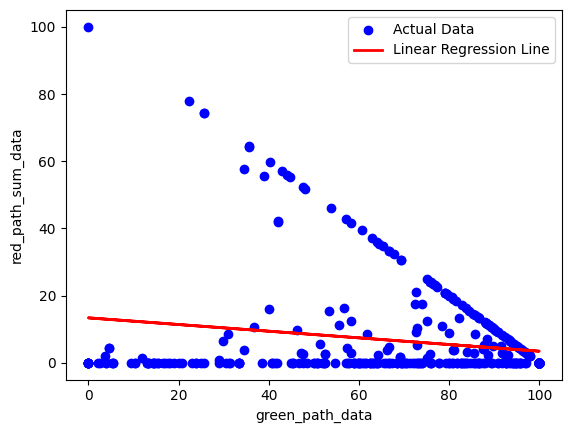

In [7]:
# Reshape the data
X = np.array(green_path_data).reshape(-1, 1)
y = np.array(red_path_sum_data)

# Create linear regression model
model = LinearRegression().fit(X, y)

# Make predictions using the model
y_pred = model.predict(X)

# Plot the scatter plot and regression line
plt.scatter(green_path_data, red_path_sum_data, color='blue', label='Actual Data')
plt.plot(green_path_data, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.xlabel('green_path_data')
plt.ylabel('red_path_sum_data')
plt.legend()
plt.title('')
plt.show()

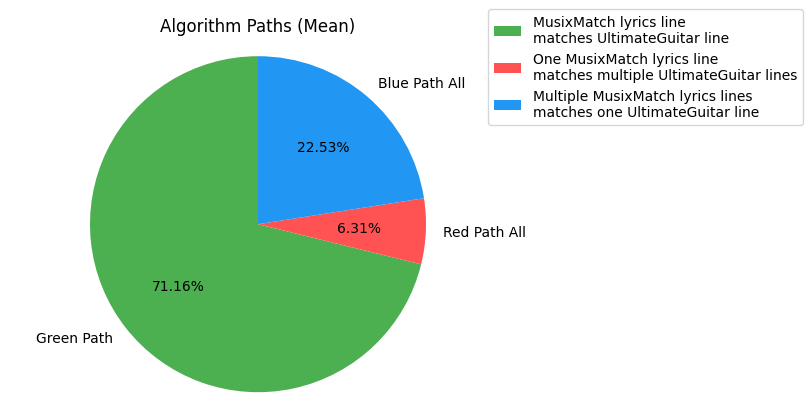

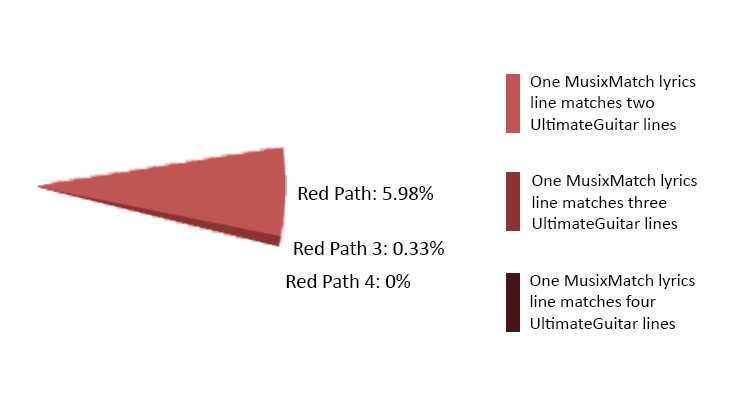

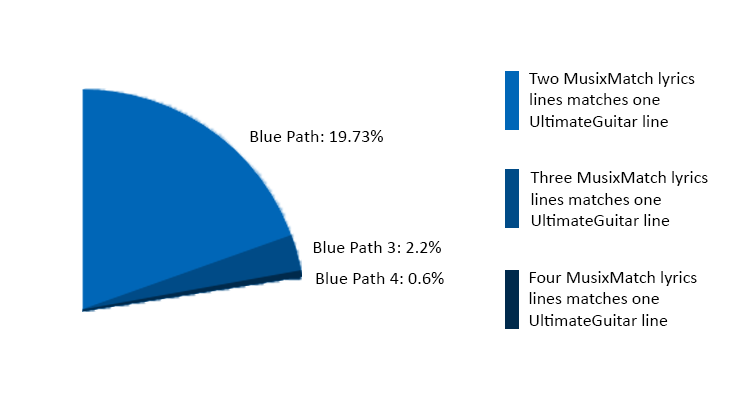

In [8]:
# Data
labels = ['Green Path', 'Red Path All', 'Blue Path All']
labels2 = ['MusixMatch lyrics line \nmatches UltimateGuitar line', 'One MusixMatch lyrics line \nmatches multiple UltimateGuitar lines', 
           'Multiple MusixMatch lyrics lines \nmatches one UltimateGuitar line']

sizes = [
    mean_green_path,
    mean_red_path_all,
    mean_blue_path_all
]

# Colors
colors = ['#4CAF50', '#FF5252', '#2196F3']

# Plotting the pie chart
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=colors)
plt.title('Algorithm Paths (Mean)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adding a legend
plt.legend(labels2, loc='upper left', bbox_to_anchor=(0.95, 1.1))

# Display the pie chart
plt.show()

display(Image(filename='Further/red_path.png'))
display(Image(filename='Further/blue_path.png'))


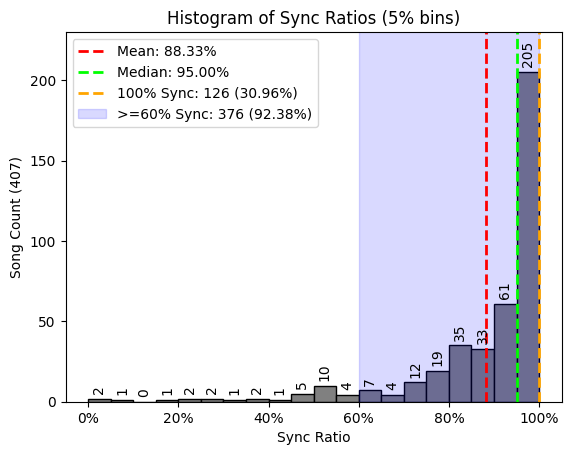

In [9]:
df = pd.DataFrame({"sync_ratio": sync_ratio_dataset})
count_100 = df.sync_ratio.value_counts()[100]

count_above_60 = sum(1 for value in sync_ratio_dataset if value >= 60)
count_above_80 = sum(1 for value in sync_ratio_dataset if value >= 80)

# Calculate mean and median
sync_ratio_dataset_mean = statistics.mean(sync_ratio_dataset)
sync_ratio_dataset_median = statistics.median(sync_ratio_dataset)

# Define the bins
bins = np.arange(0, 105, 5)

# Create the histogram
plt.hist(sync_ratio_dataset, bins=bins, edgecolor='black', color='grey')

# Add vertical lines for mean and median with percentage labels
plt.axvline(sync_ratio_dataset_mean, color='red', linestyle='dashed', linewidth=2,
            label=f'Mean: {sync_ratio_dataset_mean:.2f}%')
plt.axvline(sync_ratio_dataset_median, color='lime', linestyle='dashed', linewidth=2,
            label=f'Median: {sync_ratio_dataset_median:.2f}%')
plt.axvline(100, color='orange', linestyle='dashed', linewidth=2,
            label=f'100% Sync: {count_100} ({count_100 / len(sync_ratio_dataset) * 100:.2f}%)')

plt.fill_betweenx(y=[0, 270], x1=60, x2=100, color='blue', alpha=0.15, label=f'>=60% Sync: {count_above_60} ({count_above_60 / len(sync_ratio_dataset) * 100:.2f}%)')

# Set labels and title
plt.xlabel('Sync Ratio')
plt.ylabel('Song Count (407)')
plt.title('Histogram of Sync Ratios (5% bins)')

# Format x-axis as percentages
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 100:.0%}'))

plt.ylim(0, 230)

# Add legend
plt.legend()

def ca(count):
    if count >= 999:
        return f" ({round(count / len(sync_ratio_dataset) * 100)}%)"
    else :
        return ""

# Add counts above the bars
for bin_val, count in zip(bins[:-1], np.histogram(sync_ratio_dataset, bins=bins)[0]):
    plt.text(bin_val + 2.5, count + 5, str(count) + ca(count), color='black', ha='center', rotation=90)

# Show the plot
plt.show()

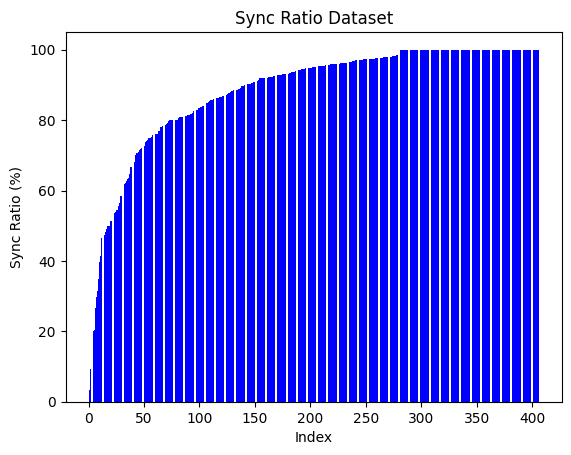

In [10]:
plt.bar(range(len(sorted(sync_ratio_dataset))), sorted(sync_ratio_dataset), color='blue')

plt.xlabel('Index')
plt.ylabel('Sync Ratio (%)')
plt.title('Sync Ratio Dataset')
plt.show()

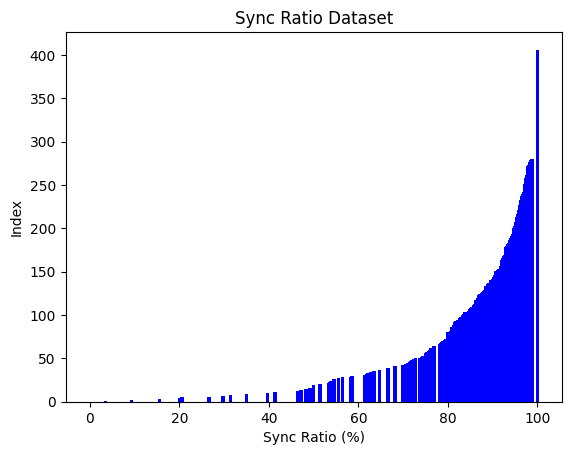

In [11]:
plt.bar(sorted(sync_ratio_dataset), range(len(sorted(sync_ratio_dataset))), color='blue')

plt.xlabel('Sync Ratio (%)')
plt.ylabel('Index')
plt.title('Sync Ratio Dataset')
plt.show()

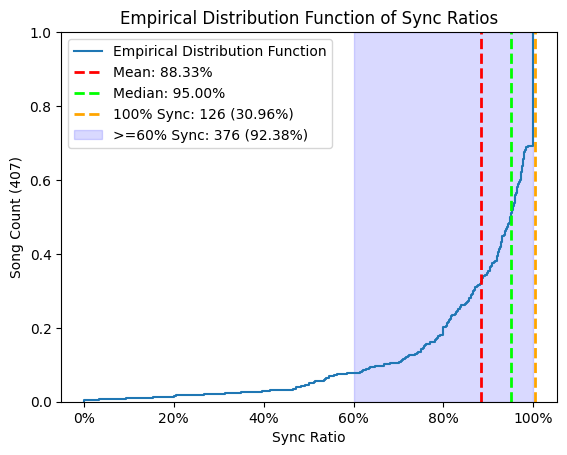

In [12]:
# Sort the dataset
sorted_data = np.sort(sync_ratio_dataset)

# Create the empirical distribution function (ECDF)
ecdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

# Plot the ECDF
plt.step(sorted_data, ecdf, label='Empirical Distribution Function')
# Set labels and title
plt.xlabel('Sync Ratio')
plt.ylabel('Song Count (407)')
plt.title('Empirical Distribution Function of Sync Ratios')

plt.ylim(0, 1)

# Add vertical lines for mean and median with percentage labels
plt.axvline(sync_ratio_dataset_mean, color='red', linestyle='dashed', linewidth=2,
            label=f'Mean: {sync_ratio_dataset_mean:.2f}%')
plt.axvline(sync_ratio_dataset_median, color='lime', linestyle='dashed', linewidth=2,
            label=f'Median: {sync_ratio_dataset_median:.2f}%')
plt.axvline(100.3, color='orange', linestyle='dashed', linewidth=2,
            label=f'100% Sync: {count_100} ({count_100 / len(sync_ratio_dataset) * 100:.2f}%)')


plt.fill_betweenx(y=[0, 1], x1=60, x2=100, color='blue', alpha=0.15, label=f'>=60% Sync: {count_above_60} ({count_above_60 / len(sync_ratio_dataset) * 100:.2f}%)')

# Format x-axis as percentages
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x / 100:.0%}'))


# Show the plot
plt.legend()
plt.show()